#DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("/content/insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.shape

(1338, 7)

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
data["charges"].max()

63770.42801

#STATISTICAL ANALYSIS

In [14]:
numeric_columns=['age','bmi','children','charges']

In [16]:
mean=data[numeric_columns].mean()
mean

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [17]:
median=data[numeric_columns].median()
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [18]:
data.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
data['age'].fillna(data['age'].mean(),inplace=True)

<Axes: ylabel='age'>

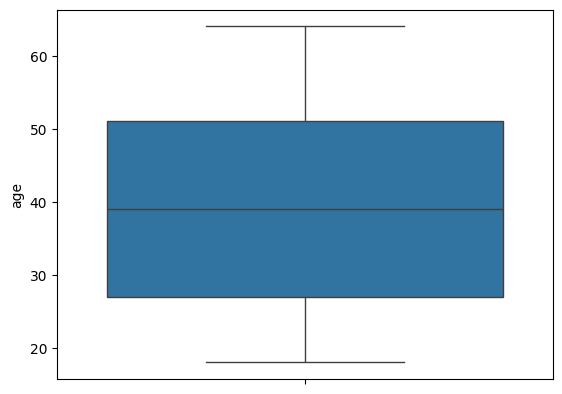

In [25]:
sns.boxplot(data['age'])

In [28]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [32]:
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

In [33]:
#seperating data
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]

In [34]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [35]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc=StandardScaler()

In [39]:
x=sc.fit_transform(x)
x

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [40]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


In [43]:
#splitting data
from sklearn.model_selection import train_test_split

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
#model building
from sklearn.linear_model import LinearRegression

In [47]:
model=LinearRegression()

In [48]:
model.fit(xtrain,ytrain)

LinearRegression()

In [67]:
ypred=model.predict(xtest)
ypred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [58]:
from sklearn.metrics import  mean_squared_error,r2_score

In [66]:
mse=mean_squared_error(ytest,ypred)
mse

33635210.43117845

In [64]:
r=r2_score(ytest,ypred)

In [63]:
print(f'R-squared(R2:{r})')

R-squared(R2:0.7833463107364536)
